In [1]:
import numpy as np
import math
import seaborn as sns
import pandas as pd
import scipy
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import copy


In [2]:
scipy.__version__

'1.0.0'

In [3]:
rna_tot_mito_trans = pd.read_csv("/Users/indrikwijaya/Desktop/rna_logrpkm/rna_tot_mito_diff0.txt", sep ='\t')
rna_tot_mito_trans.head()

,t0,t1,t2,t3,t4,t5,t6
NM_175137,0.0,0.135322,0.889177,0.697614,0.379099,0.428496,0.365264
NM_008044,0.0,-0.629459,0.013002,-0.323229,-0.564980,-0.747261,-0.864981
NM_207207,0.0,0.625057,0.872643,0.701902,-0.042764,-0.674979,-0.574226
NM_001013381,0.0,0.458537,-0.257750,-0.743292,-1.030863,0.206261,-0.455475
NM_001013389,0.0,0.911548,1.159730,0.985482,1.327724,1.062785,1.359893


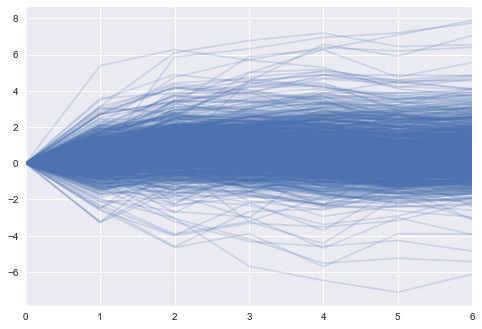

In [4]:
ax = None
ax = sns.tsplot(ax =ax, data = rna_tot_mito_trans.values, err_style = 'unit_traces')
plt.show()

In [5]:
rna_tot_mito = pd.read_csv("/Users/indrikwijaya/Desktop/rna_logrpkm/rna_tot_mito.txt", sep = '\t')
rna_tot_mito.head()

,t0,t1,t2,t3,t4,t5,t6
NM_175137,3.960592,4.095914,4.849770,4.658206,4.339691,4.389088,4.325856
NM_008044,4.315331,3.685871,4.328333,3.992102,3.750350,3.568070,3.450349
NM_207207,6.146943,6.772000,7.019586,6.848844,6.104179,5.471964,5.572717
NM_001013381,2.444733,2.903270,2.186983,1.701441,1.413871,2.650995,1.989258
NM_001013389,3.841136,4.752684,5.000866,4.826618,5.168860,4.903922,5.201029


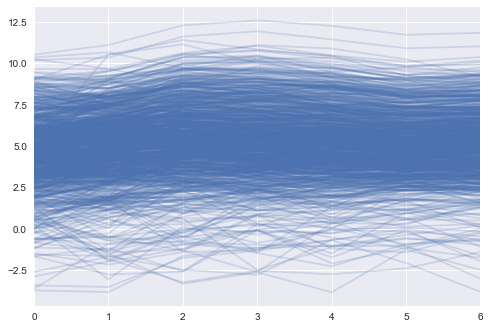

In [6]:
ax = None
ax = sns.tsplot(ax =ax, data = rna_tot_mito.values, err_style = 'unit_traces')
plt.show()

In [7]:
title_size = 85
figsize =(85,65)
xlabel_size = 85
ylabel_size = 85
xticks_size = 85
yticks_size = 85
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = hac.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram', fontsize= title_size)
        plt.xlabel('sample index or (cluster size)', fontsize = xlabel_size)
        plt.ylabel('distance', fontsize = ylabel_size)
        plt.xticks(fontsize=xticks_size, rotation =90)
        plt.yticks(fontsize=yticks_size, rotation =90)
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

#use spearman correlation
def my_metric(x,y):
    r = stats.pearsonr(x,y)[0]
    return 1-r #correlation to distance: range 0 to 2

In [8]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k,path,plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z,k , criterion = 'maxclust')
    
    #check the results
    s = pd.Series(results)
    clusters = s.unique()
    clusters.sort()
    
    #save genes to excel
    writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
    for c in clusters:
        cluster_indices = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indices)))
        if plot:
            timeSeries.T.iloc[:,cluster_indices].transpose().to_excel(writer, sheet_name = str(c))
            timeSeries.T.iloc[:, cluster_indices].plot(legend = False)
            plt.xlabel('Time point', fontsize = 15)
            plt.ylabel('Log2 Exp value', fontsize = 15)
            plt.show()
    #writer.save()

#print_clusters(timeSeries, Z, 6, plot = True)

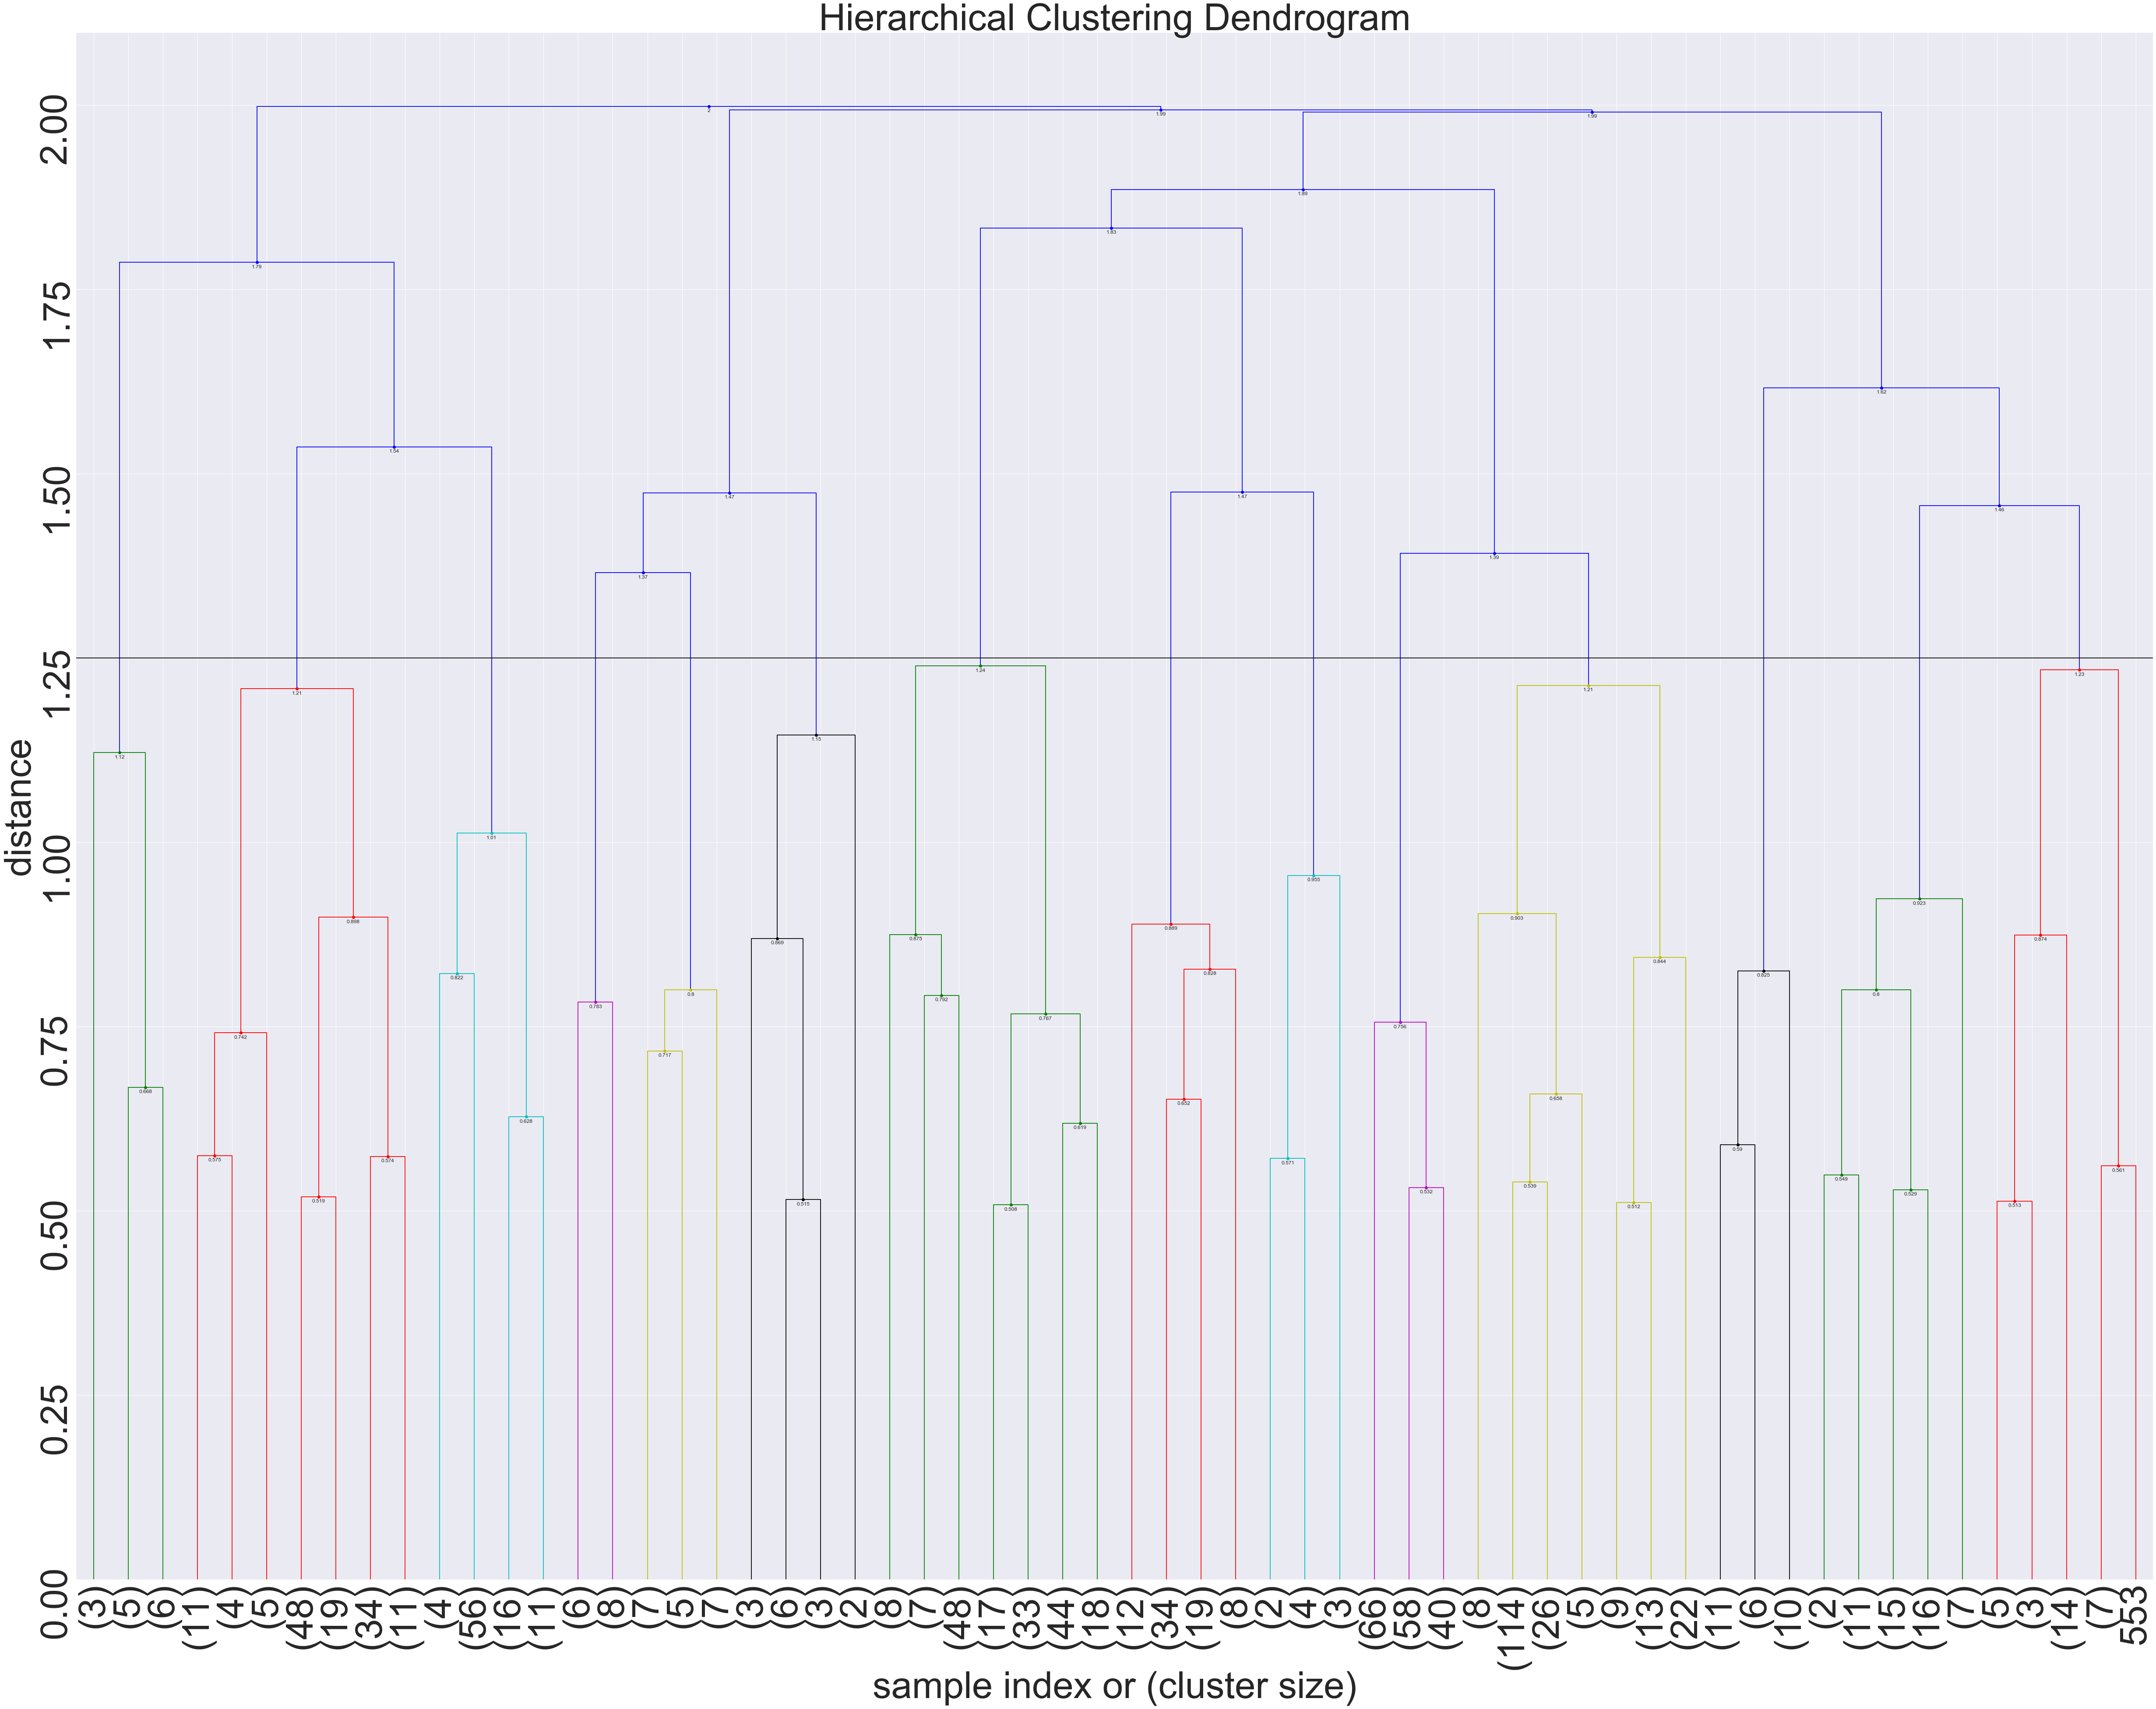

In [47]:
Z = hac.linkage(rna_tot_mito, method = 'complete', metric= my_metric,optimal_ordering=True)

plt.figure(figsize=figsize)
plt.title("hierarchical clustering dendogram")
plt.xlabel('sample index', fontsize = xlabel_size)
plt.ylabel('distance', fontsize = ylabel_size)
plt.yticks(fontsize = yticks_size, rotation = 90)
#plot dendogram
fancy_dendrogram(
    Z,
    truncate_mode = 'lastp',
    p = 60,
    leaf_rotation = 90., #rotate the x axis labels
    leaf_font_size= 45., #font size for the x axis labels
    max_d = 1.25
)
plt.show()

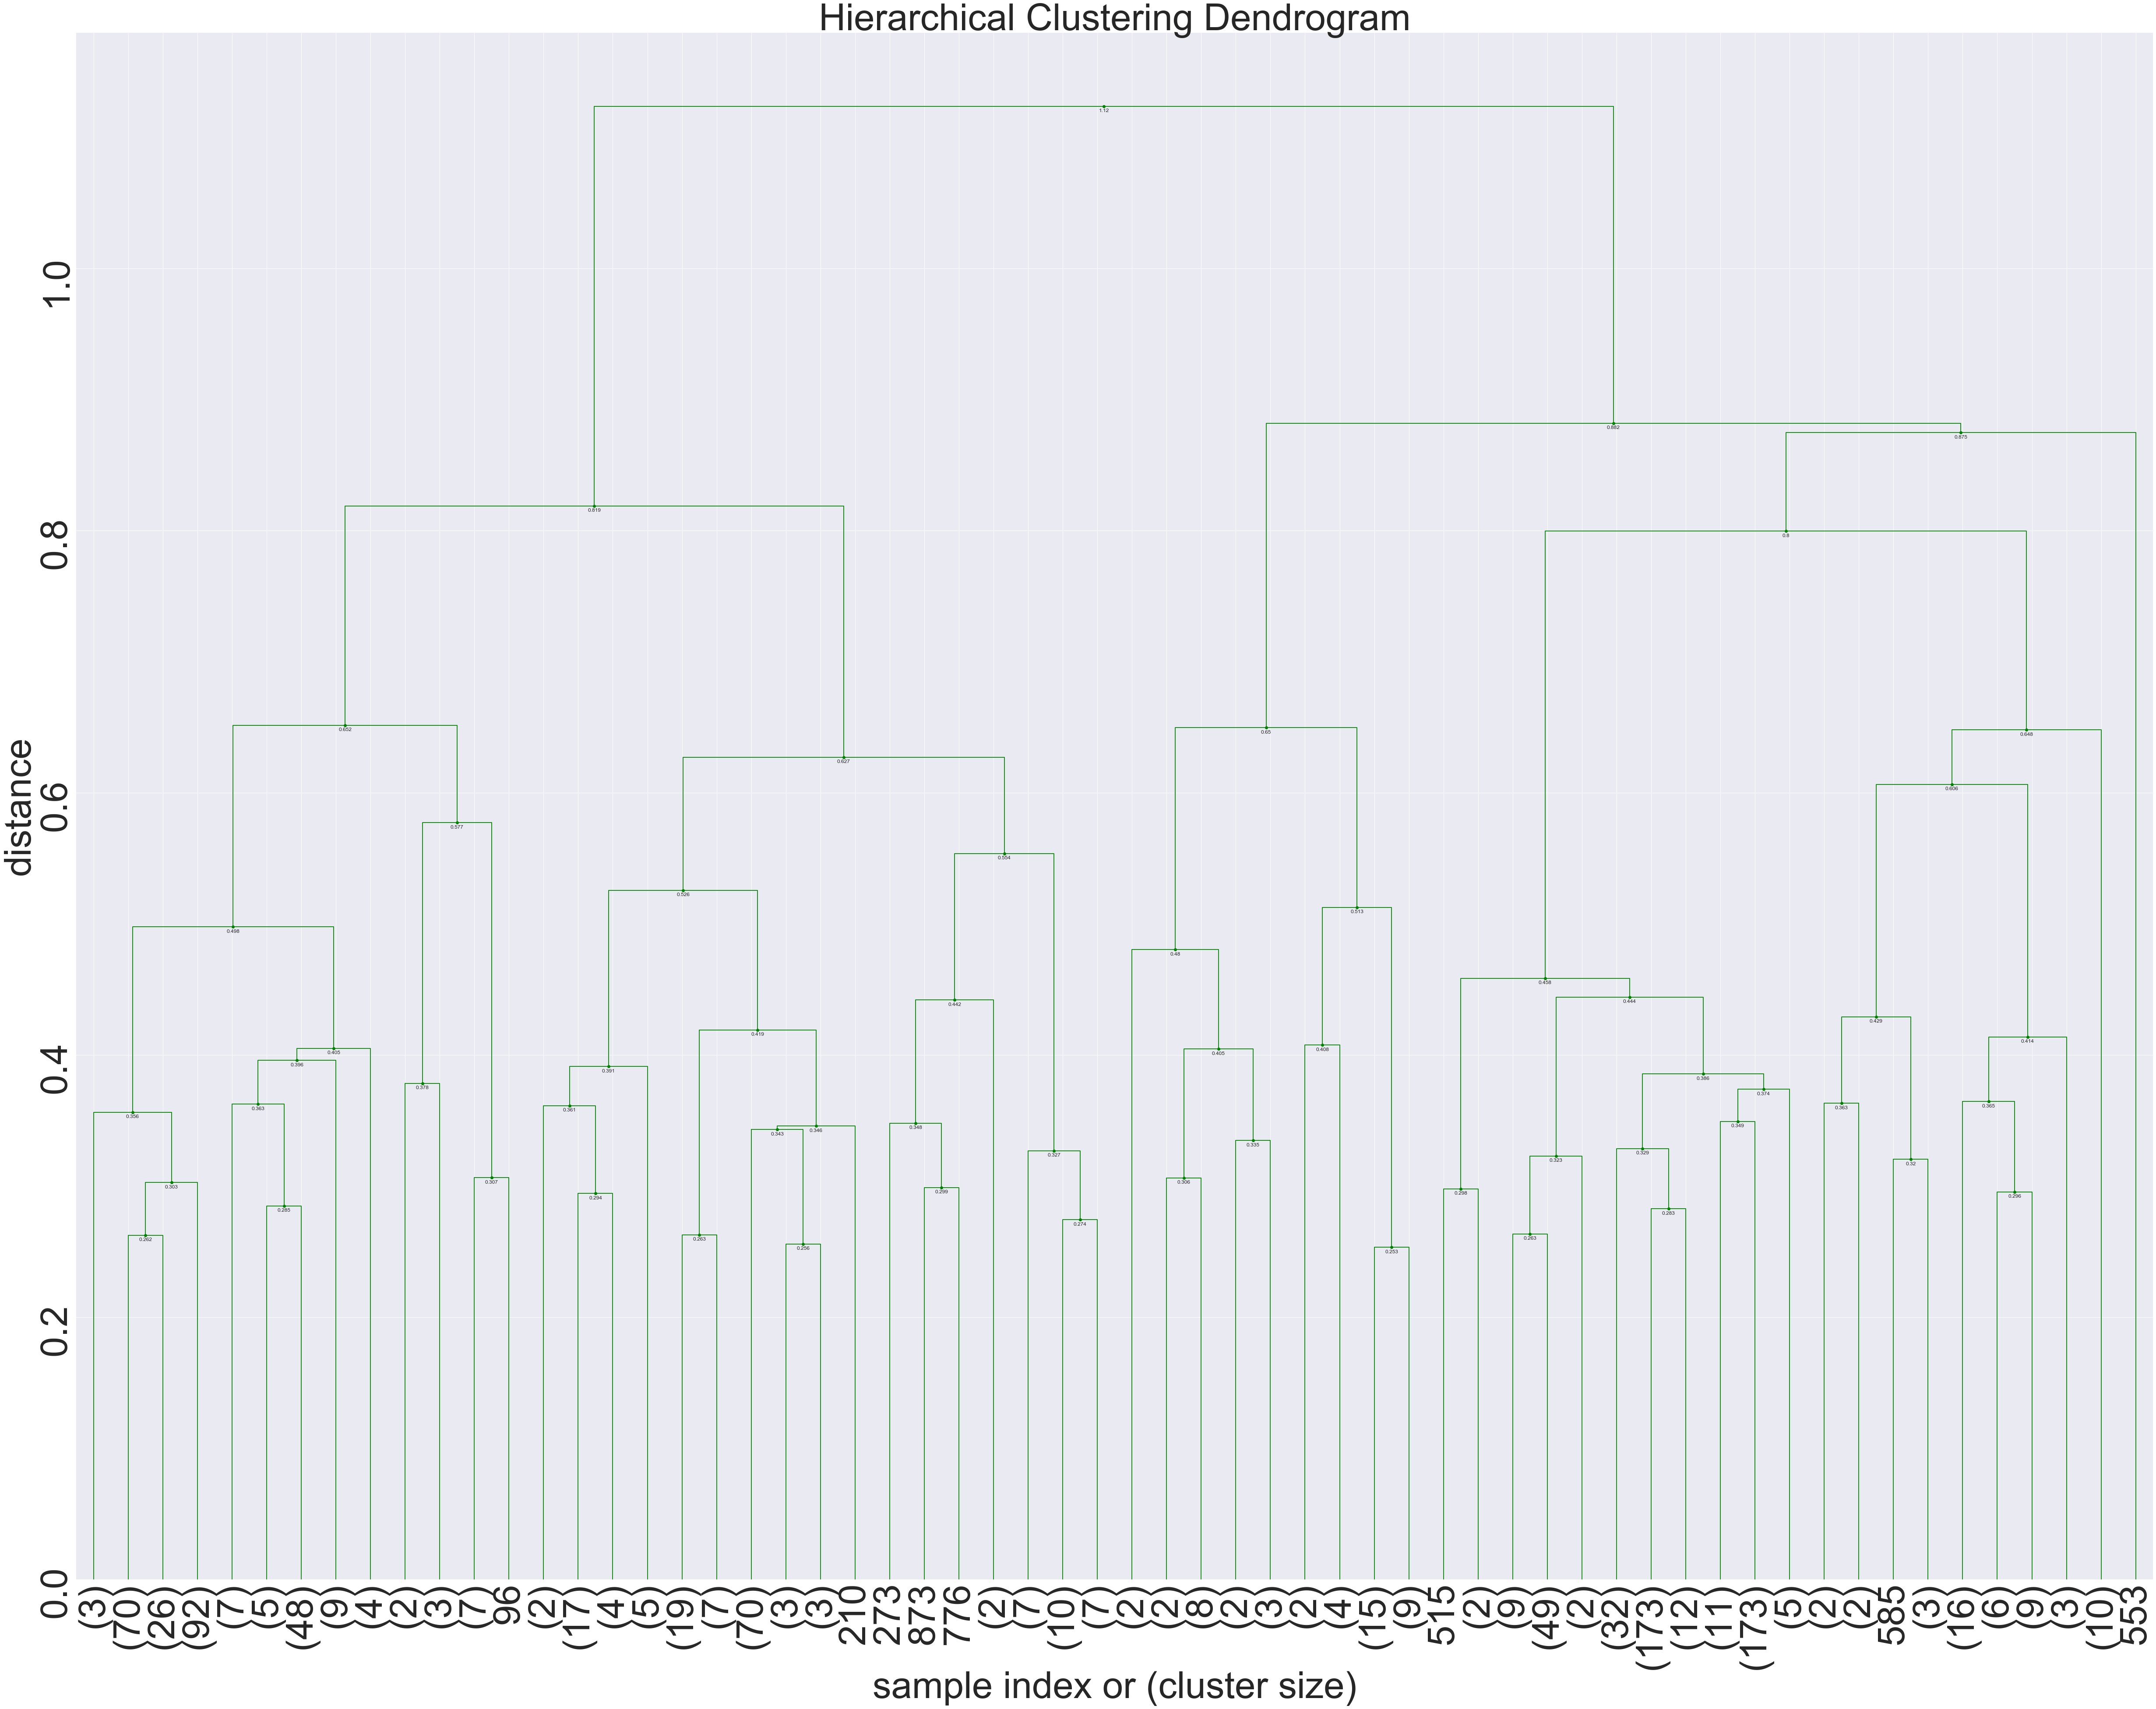

In [48]:
Z = hac.linkage(rna_tot_mito, method = 'average', metric= my_metric,optimal_ordering=True)

plt.figure(figsize=figsize)
plt.title("hierarchical clustering dendogram")
plt.xlabel('sample index', fontsize = xlabel_size)
plt.ylabel('distance', fontsize = ylabel_size)
plt.yticks(fontsize = yticks_size, rotation = 90)
#plot dendogram
fancy_dendrogram(
    Z,
    truncate_mode = 'lastp',
    p = 60,
    leaf_rotation = 90., #rotate the x axis labels
    leaf_font_size= 45., #font size for the x axis labels
    max_d = 1.25
)
plt.show()

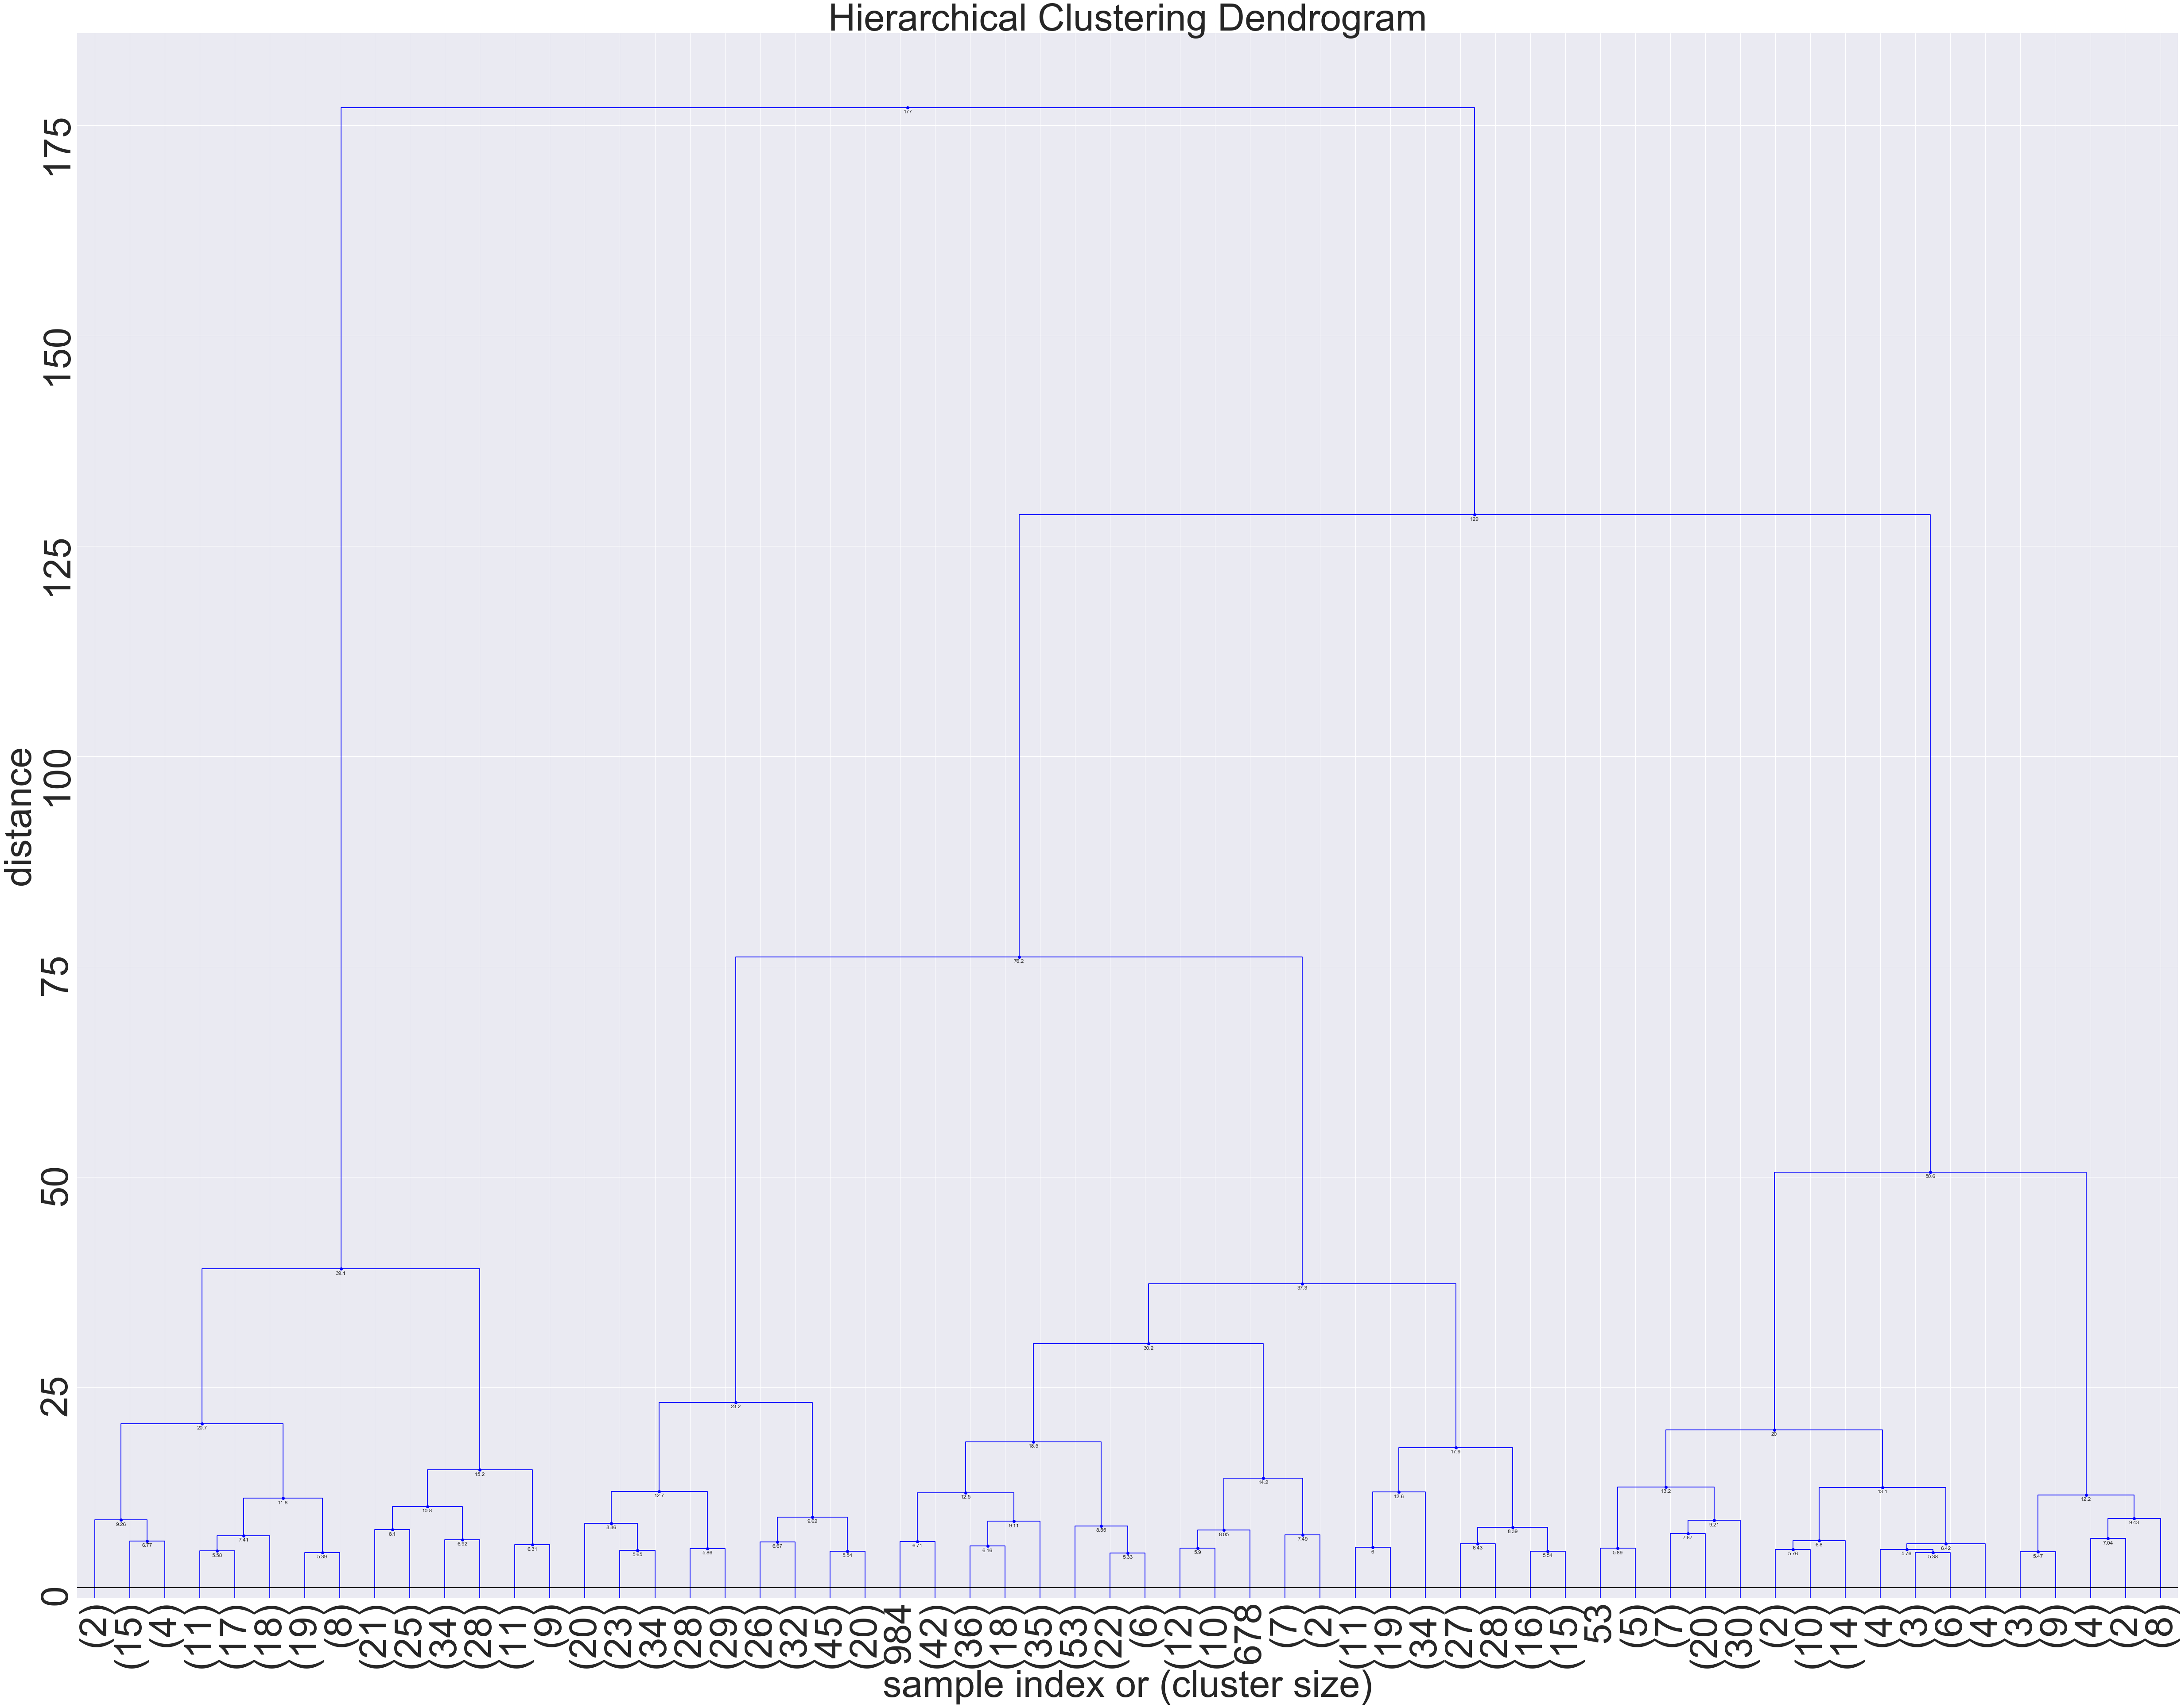

In [49]:
Z = hac.linkage(rna_tot_mito, method = 'ward', metric= 'euclidean',optimal_ordering=True)

plt.figure(figsize=figsize)
plt.title("hierarchical clustering dendogram")
plt.xlabel('sample index', fontsize = xlabel_size)
plt.ylabel('distance', fontsize = ylabel_size)
plt.yticks(fontsize = yticks_size, rotation = 90)
#plot dendogram
fancy_dendrogram(
    Z,
    truncate_mode = 'lastp',
    p = 60,
    leaf_rotation = 90., #rotate the x axis labels
    leaf_font_size= 45., #font size for the x axis labels
    max_d = 1.25
)
plt.show()

In [91]:
rna_tot_mito_trans_hac_comp = hac.linkage(rna_tot_mito_trans, method = 'complete', metric = my_metric)
leave_list = hac.leaves_list(rna_tot_mito_trans_hac_comp)

In [81]:
rna_tot_mito_reordered = rna_tot_mito.values[list(leave_list)]

In [83]:
rna_tot_mito.values

array([[ 3.96059249,  4.09591437,  4.84976958, ...,  4.33969104,
         4.3890882 ,  4.32585612],
       [ 4.31533061,  3.68587126,  4.32833273, ...,  3.75035013,
         3.56806967,  3.45034949],
       [ 6.14694285,  6.77199983,  7.01958565, ...,  6.10417883,
         5.47196372,  5.57271696],
       ..., 
       [ 7.95857493,  8.02009496,  9.27643163, ...,  9.37636573,
         8.58823068,  9.06325422],
       [ 4.1197051 ,  4.10322262,  4.52513302, ...,  3.30045671,
         2.71228604,  3.06261254],
       [ 3.88237121,  4.93954577,  5.6764315 , ...,  5.3095476 ,
         4.74556862,  4.73407044]])

In [82]:
rna_tot_mito_reordered

array([[ 5.7038959 ,  5.78552351,  5.43673746, ...,  5.71055487,
         5.51703396,  5.77079206],
       [ 4.07057038,  4.10090875,  3.49419848, ...,  3.4963261 ,
         2.92840128,  3.77554037],
       [ 3.51802936,  4.01734404,  2.88538924, ...,  3.35882258,
         3.00430139,  2.96343713],
       ..., 
       [ 5.14401238,  4.9138232 ,  5.44246478, ...,  5.18822515,
         5.1085247 ,  4.7525742 ],
       [ 3.24957274,  2.68284913,  3.99155871, ...,  3.53644664,
         3.43183858,  2.69668683],
       [ 2.57386363,  2.36800378,  3.01428697, ...,  2.79371505,
         2.95875865,  2.14083338]])

In [ ]:
g = sns.clustermap(rna_tot_mito_reordered, method = 'complete', linewidth=0, metric=my_metric, figsize=(40,30))
plt.show()

In [ ]:
g = sns.clustermap(rna_tot_mito.values, method = 'complete', linewidth =0, metric = my_metric, figsize=(40,30))
plt.show()

In [52]:
dn = hac.dendrogram(rna_tot_mito_trans_hac_comp, truncate_mode='lastp', p = 20, show_contracted=True,orientation = 'right')

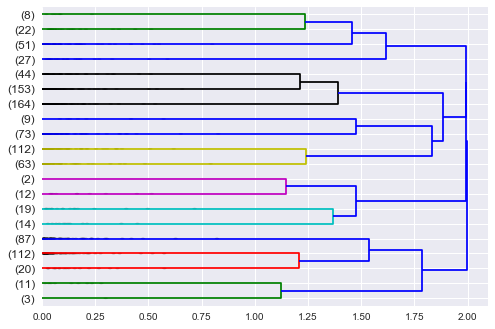

In [53]:
plt.show()

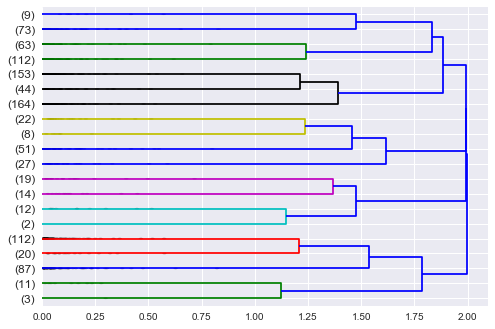

In [93]:
dn = hac.dendrogram(rna_tot_mito_trans_hac_comp, truncate_mode='lastp', p = 20, show_contracted=True,orientation = 'right')
plt.show()

In [21]:
# code initially adapted @markak on GitHub, algorithm is from
# Ziv Bar-Joseph et al., Bioinformatics 2001

import itertools

import numpy as np

from scipy.cluster import hierarchy
from scipy.spatial import distance


def order_tree(Z, rd, M):
    def swap_subtrees(n):
        n.right, n.left = n.left, n.right

    for v in range(Z.shape[0] * 2, Z.shape[0], -1):
        L,R = rd[v].left.pre_order(), rd[v].right.pre_order()
        u,w = min(itertools.product(L, R),
                  key=lambda u_w: M[v, u_w[0], u_w[1]])

        if rd[v].left.count > 1:
            LR = rd[v].left.right.pre_order()
            if u in LR:
                swap_subtrees(rd[v].left)

        if rd[v].right.count > 1:
            RL = rd[v].right.left.pre_order()
            if w in RL:
                swap_subtrees(rd[v].right)


def optimal_scores(Z, rd, dists):
    # Z - linkage matrix from scipy.cluster.hierarchy
    # rd - ClusterNode dictionary from to_tree
    # dists - distance matrix

    n_nodes = Z.shape[0] + 1

    M = {}

    # iterating through the linkage matrix guarantees
    # we never see a node before its children
    for i in range(Z.shape[0]):
        # linkage matrix starts at first non-leaf node
        v = n_nodes + i
        # the left and right nodes
        j,k = int(Z[i, 0]), int(Z[i, 1])

        if Z[i, 3] == 2:
            # both j and k are leaves, so there is no ordering to be done
            M[v, j, k] = M[v, k, j] = Z[i, 2]
        elif rd[j].is_leaf():
            # if j is a leaf, we calculate the distances to all
            # subtrees of k
            kwns = [kwn for kwn in M if kwn[0] == k]
            for k,w,n in kwns:
                M[v, j, n] = M[v, n, j] = M[k, w, n] + dists[j,w]
                M[v, j, w] = M[v, w, j] = M[k, w, n] + dists[j,n]
        elif rd[k].is_leaf():
            # symmetrically if k is a leaf
            jums = [jum for jum in M if jum[0] == j]
            for j,u,m in jums:
                M[v, m, k] = M[v, k, m] = M[j, u, m] + dists[k,u]
                M[v, u, k] = M[v, k, u] = M[j, u, m] + dists[k,m]
        else:
            # neither j nor k are leaves, so we consider combinations of subtrees
            LL,LR = rd[j].left.pre_order(), rd[j].right.pre_order()
            RL,RR = rd[k].left.pre_order(), rd[k].right.pre_order()

            for (this_L,that_L),(this_R,that_R) in itertools.product(((LL,LR), (LR,LL)),
                                                                     ((RL,RR), (RR,RL))):
                for u,w in itertools.product(this_L, this_R):
                    m_order = sorted(that_L, key=lambda m: M[j, u, m])
                    n_order = sorted(that_R, key=lambda n: M[k, w, n])
                    C = dists[np.ix_(m_order, n_order)].min()
                    Cmin = 1e10
                    for m,n in itertools.product(m_order, n_order):
                        if M[j, u, m] + M[k, w, n] + C >= Cmin:
                            break
                        C = M[j, u, m] + M[k, w, n] + dists[m,n]
                        if C < Cmin:
                            Cmin = C

                    M[v, u, w] = M[v, w, u] = Cmin

    return M


def optimal_ordering(Z, dists):
    # Z - linkage matrix
    # dists - the distance matrix

    # get the tree and a list of handles to its leaves
    tree,rd = hierarchy.to_tree(Z, True)

    # Generate scores
    M = optimal_scores(Z, rd, dists)
    # re-order the tree accordingly
    order_tree(Z, rd, M)

    # new leaf ordering
    row_reorder = tree.pre_order()

    return row_reorder


def plot_leaf_ordering(X, method, metric):
    dists = distance.squareform(distance.pdist(X, metric=metric))
    dists2 = distance.squareform(distance.pdist(X.T, metric=metric))

    Z = hierarchy.linkage(X, method=method, metric=metric)
    Z2 = hierarchy.linkage(X.T, method=method, metric=metric)

    t,rd = hierarchy.to_tree(Z, True)
    t2,rd2 = hierarchy.to_tree(Z2, True)

    M = optimal_scores(Z, rd, dists)
    order_tree(Z, rd, M)
    M2 = optimal_scores(Z2, rd2, dists2)
    order_tree(Z2, rd2, M2)

    rr = t.pre_order()
    rr2 = t2.pre_order()
    return rr, rr2
#     import matplotlib.pyplot as plt
#     from matplotlib.gridspec import GridSpec

#     fig = plt.figure(figsize=(8,8))
#     gs = GridSpec(2, 2, top=0.95, bottom=0.05, left=0.05, right=0.95,
#                   hspace=0.01, wspace=0.01,
#                   width_ratios=(1,3), height_ratios=(1,3))

#     ax01 = fig.add_subplot(gs[0,1])
#     ax10 = fig.add_subplot(gs[1,0])
#     ax11 = fig.add_subplot(gs[1,1])

#     hierarchy.dendrogram(Z2, ax=ax01)
#     ax01.set_axis_off()
#     hierarchy.dendrogram(Z, orientation='right', ax=ax10)
#     ax10.set_axis_off()

#     ax11.matshow(X[np.ix_(rr,rr2)], cmap="Blues", aspect="auto")
#     ax11.tick_params(**{s:'off' for s in ('top', 'bottom', 'right')})
#     ax11.tick_params(labeltop='off', labelleft='off', labelright='on')

#     ax11.set_xticks(np.arange(len(rr2)))
#     ax11.set_xticklabels(rr2, fontsize=5.0)
#     ax11.set_yticks(np.arange(len(rr)))
#     ax11.set_yticklabels(rr, fontsize=5.0)

#     plt.show()

In [23]:
rr, rr2 = plot_leaf_ordering(rna_tot_mito,'complete', my_metric)

In [24]:
len(rr)

1006

In [25]:
len(rr2)

7

In [43]:
# Create simulated data as in the paper
X = np.zeros((100, 100))
for n in [0,10,20,30,40,50,60]:
    X[(10.*n//7):(10.*(n+10)//7),n:n+40] = 1

for x,y in zip(np.random.choice(np.arange(100), 500), np.random.choice(np.arange(100), 500)):
    X[x,y] = -1

TypeError: slice indices must be integers or None or have an __index__ method

In [42]:
X = np.zeros((5,5))
X

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [72]:
from scipy.cluster import hierarchy
from scipy.spatial import distance

def leaves(t, t2=None):
    """ Returns the leaves of a ClusterNode """
    try:
        return t.pre_order()
    except AttributeError:
        if t2 is not None:
            return t2.pre_order()
        else:
            return []

# For an element x, returns the set that x isn't in
other = lambda x_V_W: x_V_W[2] if x_V_W[0] in x_V_W[1] else x_V_W[1]
M = {}

def optimal_scores(v, D, fast=True):
    """ Implementation of Ziv-Bar-Joseph et al.'s leaf order algorithm
    v is a ClusterNode
    D is a distance matrix """
    def score_func(left, right, u, m, w, k):
        return Mfunc(left, u, m) + Mfunc(right, w, k) + D[m, k]
    
    def Mfunc(v, a, b):
        if a == b:
            M[v, a, b] = 0
        return M[v, a, b]
    
    if v.is_leaf():
        n = v.get_id()
        M[v, n, n] = 0
        return 0
    else:
        L = leaves(v.left)
        R = leaves(v.right)
        LL = leaves(v.left.left, v.left)
        LR = leaves(v.left.right, v.left)
        RL = leaves(v.right.left, v.right)
        RR = leaves(v.right.right, v.right)
        for l in L:
            for r in R:
                M[v.left, l, r] = slow_optimal_scores(v.left, D)
                M[v.right, l, r] = slow_optimal_scores(v.right, D)
                for u in L:
                    for w in R:
                        if fast:
                            m_order = sorted(other(u, LL, LR), key=lambda m: Mfunc(v.left, u, m))
                            k_order = sorted(other(w, RL, RR), key=lambda k: Mfunc(v.right, w, k))
                            C = min([D[m, k] for m in other(u, LL, LR) for k in other(w, RL, RR)])
                            Cmin = 1e10
                            for m in m_order:
                                if M[v.left, u, m] + M[v.right, w, k_order[0]] + C >= Cmin:
                                    break
                                for k in k_order:
                                    if M[v.left, u, m] + M[v.right, w, k] + C >= Cmin:
                                        break
                                    C = score_func(v.left, v.right, u, m, w, k)
                                    if C < Cmin:
                                        Cmin = C
                            M[v, u, w] = M[v, w, u] = Cmin
                        else:
                            M[v, u, w] = M[v, w, u] = \
                                min([score_func(v.left, v.right, u, m, w, k) \
                                    for m in other(u, LL, LR) \
                                    for k in other(w, RL, RR)])
                return M[v, l, r]

slow_optimal_scores = lambda v,D: optimal_scores(v, D, fast=False)
fast_optimal_scores = lambda v,D: optimal_scores(v, D, fast=True)

def order_tree(v, D, fM=None, scores=slow_optimal_scores):
    """ Returns an optimally ordered tree """
    # Generate scores the first pass
    if fM is None:
        fM = 1
        scores(v, D)
    
    L = leaves(v.left)
    R = leaves(v.right)
    if len(L) and len(R):
        u, w = min([(u, w) for u in L for w in R], key=lambda u_w: M[v, u_w[0], u_w[1]])
        if w in leaves(v.right.left):
            v.right.right, v.right.left = v.right.left, v.right.right
        if u in leaves(v.left.right):
            v.left.left, v.left.right = v.left.right, v.left.left
        v.left = order_tree(v.left, D, fM)
        v.right = order_tree(v.right, D, fM)
    return v

In [ ]:
sns.heatmap(rna_tot_mito.values, linewidths=0)
plt.show()
g = sns.clustermap(rna_tot_mito.values, linewidths=0, metric = my_metric)
plt.show()

In [73]:
X = rna_tot_mito.values
M = {}
self = g.dendrogram_row
tree = hierarchy.to_tree(self.linkage)
dists = distance.squareform(distance.pdist(self.array, metric=self.metric))
order_tree(tree, dists)
row_reorder = leaves(tree)

self = g.dendrogram_col
tree = hierarchy.to_tree(self.linkage)
dists = distance.squareform(distance.pdist(self.array, metric=self.metric))
order_tree(tree, dists)
col_reorder = leaves(tree)

sns.heatmap(pd.DataFrame(X).ix[row_reorder, col_reorder], \
            linewidth=0)

TypeError: unhashable type: 'ClusterNode'

In [ ]:
M = {}
self = g.dendrogram_row
tree = hierarchy.to_tree(self.linkage)
dists = distance.squareform(distance.pdist(self.array, metric=self.metric))
order_tree(tree, dists, scores=fast_optimal_scores)
row_reorder = leaves(tree)

self = g.dendrogram_col
tree = hierarchy.to_tree(self.linkage)
dists = distance.squareform(distance.pdist(self.array, metric=self.metric))
order_tree(tree, dists, scores=fast_optimal_scores)
col_reorder = leaves(tree)

sns.heatmap(pd.DataFrame(X).ix[row_reorder, col_reorder], \
            linewidth=0)

In [ ]:
@property
def reordered_ind(self):
    M = {}
    tree = hierarchy.to_tree(self.linkage)
    dists = distance.squareform(distance.pdist(self.array, metric=self.metric))
    return leaves(order_tree(tree, dists))

sns.matrix._DendrogramPlotter.reordered_ind = reordered_ind

In [ ]:
sns.clustermap(X, linewidth=0, metric = my_metric)

In [70]:
sum = lambda x,y: x+y

In [71]:
sum(4,5)

9